#Task 1: Basic Probabilities and Visualizations (1)

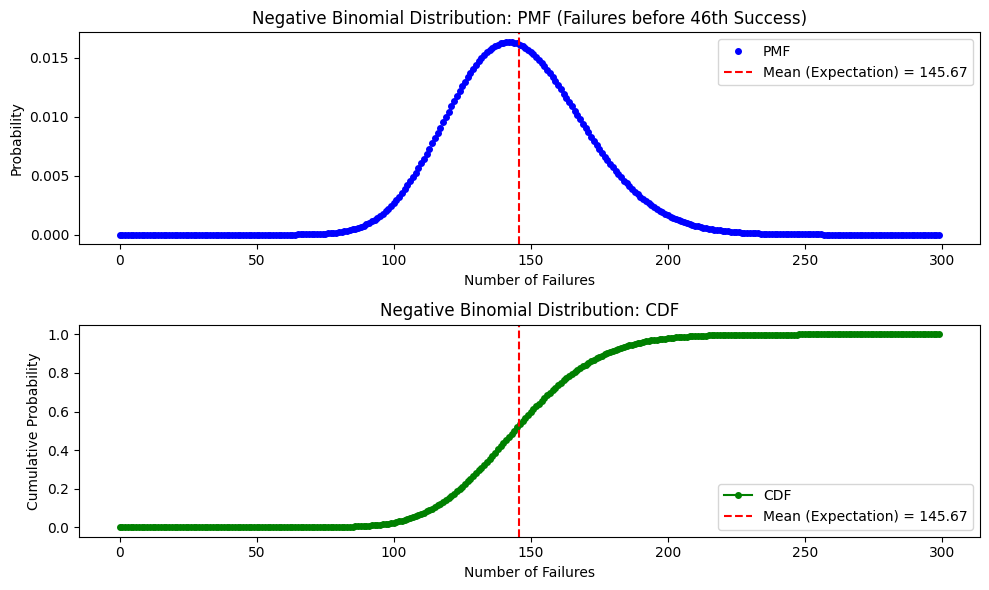

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

r = 46
p = 0.24
mean = r * (1 - p) / p

k_values = np.arange(0, 300, 1)

pmf_values = nbinom.pmf(k_values, r, p)

cdf_values = nbinom.cdf(k_values, r, p)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(k_values, pmf_values, 'bo', label='PMF', markersize=4)
plt.title('Negative Binomial Distribution: PMF (Failures before 46th Success)')
plt.xlabel('Number of Failures')
plt.ylabel('Probability')
plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean (Expectation) = {mean:.2f}')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(k_values, cdf_values, 'go-', label='CDF', markersize=4)
plt.title('Negative Binomial Distribution: CDF')
plt.xlabel('Number of Failures')
plt.ylabel('Cumulative Probability')
plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean (Expectation) = {mean:.2f}')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


#Task 2: Basic Probabilities and Visualizations (2)

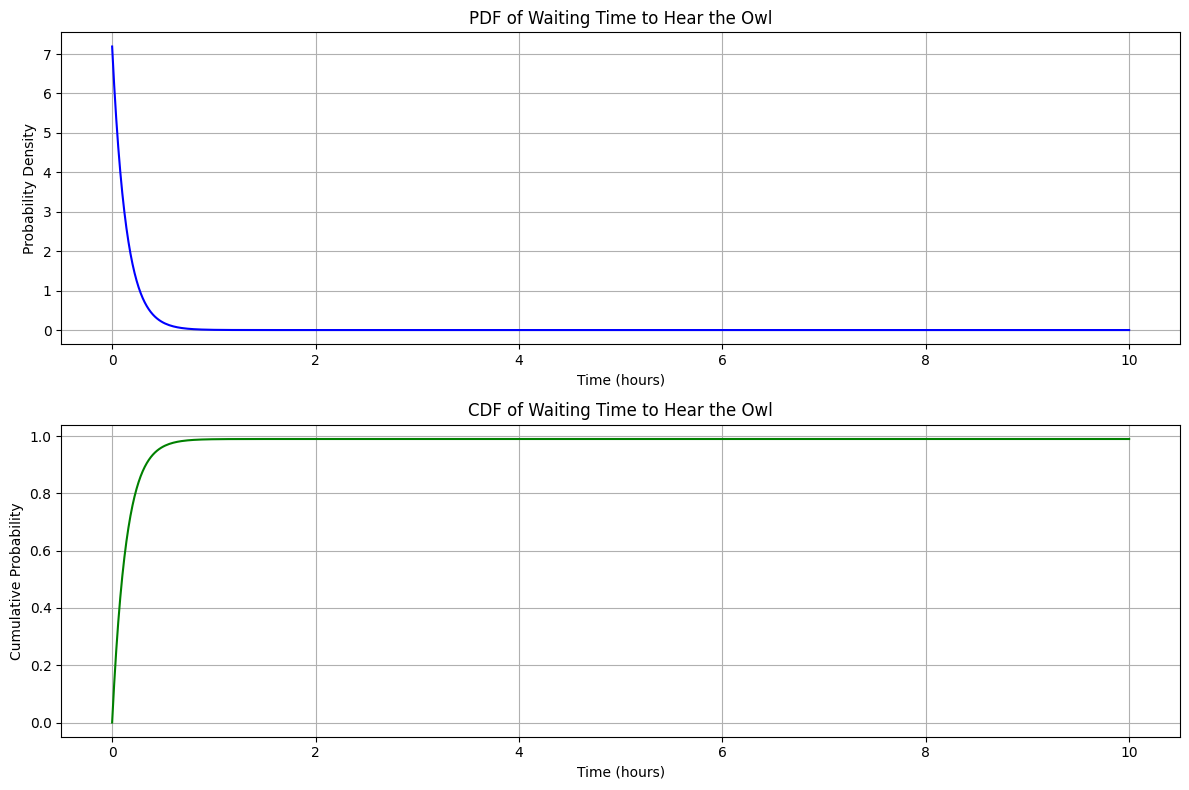

Mean: 0.1367857142857143
Variance: 0.01921058673469388
Quartiles (25th, 50th, 75th): [np.float64(0.04009698840114993), np.float64(0.0969615913246167), np.float64(0.19561170139983985)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm

ξ5 = 0.73
ξ6 = 7
ξ7 = 0.26
ξ8 = 8

def pdf(y):
    return ξ5 * ξ6 * np.exp(-ξ6 * y) + ξ7 * ξ8 * np.exp(-ξ8 * y)

def cdf(y):
    return quad(pdf, 0, y)[0]

y_values = np.linspace(0, 10, 500)

pdf_values = pdf(y_values)
cdf_values = [cdf(y) for y in y_values]

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(y_values, pdf_values, 'b-', label='PDF')
plt.title('PDF of Waiting Time to Hear the Owl')
plt.xlabel('Time (hours)')
plt.ylabel('Probability Density')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y_values, cdf_values, 'g-', label='CDF')
plt.title('CDF of Waiting Time to Hear the Owl')
plt.xlabel('Time (hours)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

mean, _ = quad(lambda y: y * pdf(y), 0, np.inf)
mean_squared, _ = quad(lambda y: y**2 * pdf(y), 0, np.inf)
variance = mean_squared - mean**2

from scipy.optimize import fsolve

def find_quartile(q):
    return fsolve(lambda y: cdf(y) - q, 0)[0]

quartiles = [find_quartile(0.25), find_quartile(0.50), find_quartile(0.75)]

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Quartiles (25th, 50th, 75th): {quartiles}")


#Task 3: Transformed Random Variables

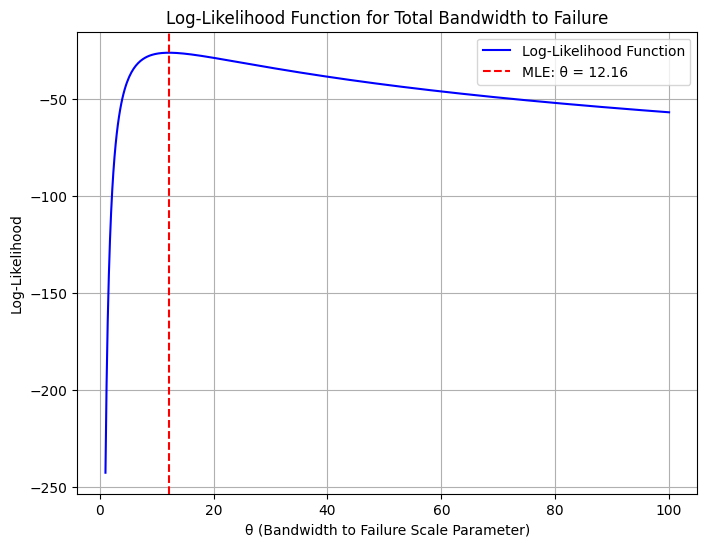

Maximum Likelihood Estimate for θ: 12.160001357925033
Expectation of Total Bandwidth to Failure (E(T)): 24.320002715850066


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

s_values = np.array([18, 131, 25, 76, 54])

def log_likelihood(theta, s_values):
    return -np.sum(np.log(1 / (24 * theta**5) * s_values**4 * np.exp(-s_values / theta)))

initial_theta = 10

result = minimize(log_likelihood, initial_theta, args=(s_values), bounds=[(0.1, None)])

theta_mle = result.x[0]

theta_values = np.linspace(1, 100, 500)

log_likelihood_values = np.array([log_likelihood(theta, s_values) for theta in theta_values])

plt.figure(figsize=(8, 6))
plt.plot(theta_values, -log_likelihood_values, label='Log-Likelihood Function', color='blue')
plt.axvline(x=theta_mle, color='red', linestyle='--', label=f'MLE: θ = {theta_mle:.2f}')
plt.title('Log-Likelihood Function for Total Bandwidth to Failure')
plt.xlabel('θ (Bandwidth to Failure Scale Parameter)')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

expectation_T = 2 * theta_mle

print(f"Maximum Likelihood Estimate for θ: {theta_mle}")
print(f"Expectation of Total Bandwidth to Failure (E(T)): {expectation_T}")


#Task 4: Hypothesis Test

In [7]:
import numpy as np
from scipy import stats

historical_mean = 880
sample_weights = np.array([868, 736, 762, 897, 809, 890, 1012, 901, 946, 848])

sample_mean = np.mean(sample_weights)
sample_std = np.std(sample_weights, ddof=1)
n = len(sample_weights)

t_statistic, p_value = stats.ttest_1samp(sample_weights, historical_mean)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The new system produces different weights.")
else:
    print("Fail to reject the null hypothesis: The new system does not produce different weights.")


Sample Mean: 866.9
Sample Standard Deviation: 82.84047588253247
T-statistic: -0.5000675926457442
P-value: 0.6290255598229941
Fail to reject the null hypothesis: The new system does not produce different weights.


#Task 5: Regularized Regression

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.84714e-32): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


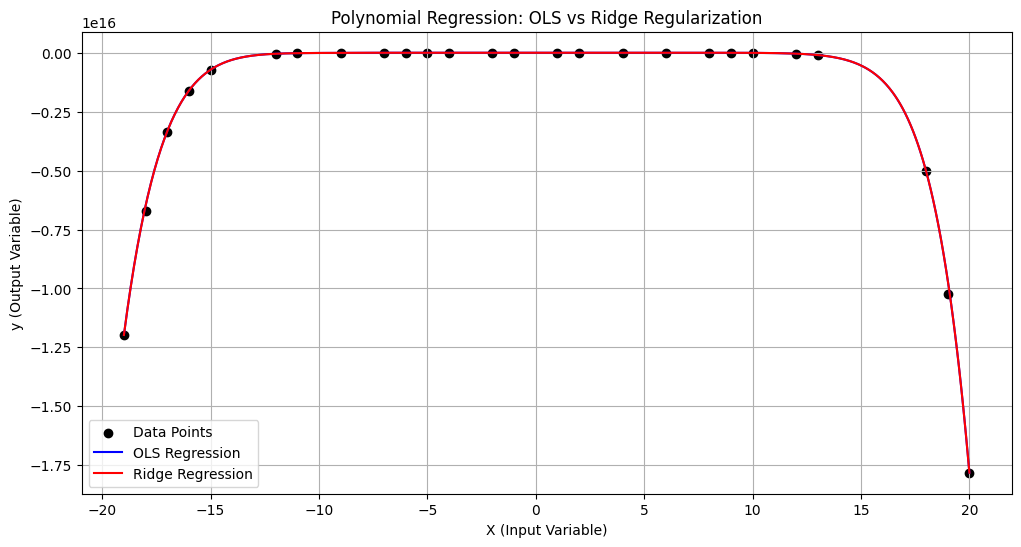

OLS Model Coefficients: [ 0.00000000e+00 -1.42480124e+09  3.19006465e+08 -2.86572232e+10
  3.46854589e+09  1.07113226e+09 -1.05226731e+08 -1.20824476e+07
  1.05106397e+06  5.04675928e+04 -4.06697165e+03 -5.81526195e+01
  3.50614071e-01]
Ridge Model Coefficients: [ 0.00000000e+00  6.09073914e+11 -1.58340664e+11 -5.99192633e+10
  8.93374789e+09  1.56056931e+09 -1.75853914e+08 -1.53113086e+07
  1.46190455e+06  5.99697413e+04 -5.15665605e+03 -6.83776456e+01
  1.42061989e+00]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

data = np.array([
    (19, -10233244378829096), (2, -3937.38), (-11, -18458202657829.62),
    (20, -17819891633986530), (-15, -718181747385985.4), (6, -7366021921.99),
    (4, -44050213.24), (-7, -88902661716.27), (-18, -6711830463838900),
    (-17, -3365082801405407.5), (12, -37349866643220.66), (-12, -51455409330874.12),
    (-6, -14773945893.53), (-9, -1703754093828.18), (1, -11.99), (-4, -135200126.97),
    (9, -1064816845393.58), (13, -97589644727233.92), (-19, -11973504784548742),
    (-16, -1605192160890619), (-5, -1836296544.99), (18, -5015003750002198),
    (10, -4075495041878.25), (8, -266880119004.75), (-1, -10.43), (-2, -49847.64)
])

X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

y_ols_pred = ols_model.predict(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_ridge_pred = ridge_model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='black', label='Data Points')

X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_ols_range = ols_model.predict(X_range_poly)
plt.plot(X_range, y_ols_range, label='OLS Regression', color='blue')

y_ridge_range = ridge_model.predict(poly.transform(X_range))
plt.plot(X_range, y_ridge_range, label='Ridge Regression', color='red')

plt.title('Polynomial Regression: OLS vs Ridge Regularization')
plt.xlabel('X (Input Variable)')
plt.ylabel('y (Output Variable)')
plt.legend()
plt.grid(True)
plt.show()

print(f"OLS Model Coefficients: {ols_model.coef_}")
print(f"Ridge Model Coefficients: {ridge_model.coef_}")


#Task 6: Bayesian Estimates

Bayesian estimate of θ: 0.8584015103838892


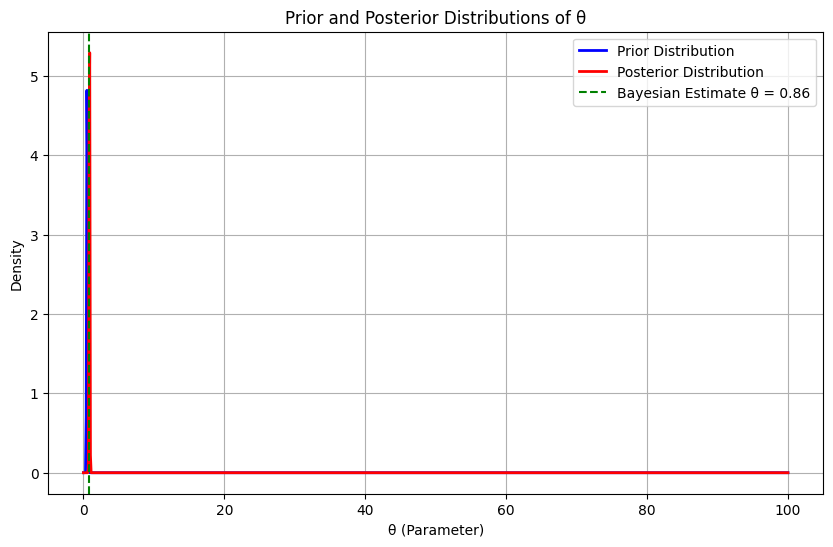

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

alpha = 54
beta = 99
sample_mean = 21.88

n = 10

alpha_posterior = alpha + n * sample_mean
beta_posterior = beta + n * sample_mean

theta_hat = alpha_posterior / beta_posterior

print(f"Bayesian estimate of θ: {theta_hat}")

theta_values = np.linspace(0, 100, 1000)

prior_pdf = gamma.pdf(theta_values, alpha, scale=1/beta)
posterior_pdf = gamma.pdf(theta_values, alpha_posterior, scale=1/beta_posterior)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_pdf, label='Prior Distribution', color='blue', linewidth=2)
plt.plot(theta_values, posterior_pdf, label='Posterior Distribution', color='red', linewidth=2)
plt.axvline(theta_hat, color='green', linestyle='--', label=f'Bayesian Estimate θ = {theta_hat:.2f}')
plt.title('Prior and Posterior Distributions of θ')
plt.xlabel('θ (Parameter)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
